In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from math import *

In [2]:
# Matplotlib settings for plotting
plt.rc('lines', linewidth=3, markersize=4)
plt.rc('axes', labelweight='heavy', titleweight='heavy', labelsize=16, titlesize=16) # Default fontsizes for printing
plt.rc('axes.spines', top=False, right=False) # Switch off top/right axes
plt.rc('legend', fontsize=15) # Default fontsizes for printing
plt.rc('xtick', labelsize=15) # Default fontsizes for printing
plt.rc('ytick', labelsize=15) # Default fontsizes for printing
plt.rc('figure', titlesize=16, titleweight='heavy') # Default fontsizes for printing
plt.rcParams['figure.dpi'] = 600

In [3]:
times = np.array([0.167, 1.0, 10.0, 60.0, 120.0]) # Create a NumPy array with time points in minutes

In [4]:
def read_to_df(file):
    """Read and create a pandas DataFrame for the given argument.
    
    Args:
        file: There are four possible options:
            'segs' - peptide segments
            'expt' - experimental HDX deuterated fractions
            'pred' - calculated HDX deuterated fractions
    
    Returns:
        df: A pandas DataFrame containing data for the given argument.
    """
    if file == 'segs':
        # Read and create a pandas DataFrame using a residue segments file
        df = pd.read_csv(os.path.expandvars('/file/path/to/HDXMS_expt_data/system-name_residue_segs.txt'),
                         sep='\s+', header=None, names=['ResStr', 'ResEnd'])
    elif file == 'expt':
        # Read and create a pandas DataFrame using an experimental deuterated fractions file
        df = pd.read_csv(os.path.expandvars('/file/path/to/HDXMS_expt_data/system-name_expt_dfracs.dat'), 
                         sep='\s+', skiprows=[0], header=None, usecols=[2, 3, 4, 5, 6], names=times)
    elif file == 'pred':
        # Read and create a pandas DataFrame using a computed deuterated fractions file
        df = pd.read_csv(os.path.expandvars('/file/path/to/CalcHDX/system-name_SUMMARY_segment_average_fractions.dat'), 
                         sep='\s+', skiprows=[0], header=None, usecols=[2, 3, 4, 5, 6], names=times)
    elif file == 'reweighted':
        df = pd.read_csv(os.path.expandvars('/file/path/to/Reweighting/reweighting_gamma_1x10^0_final_segment_fractions.dat'), 
                         sep='\s+', skiprows=[0], header=None, names=times)
    else:
        print("Incorrect argument given. Please choose from the following options: 'segs' 'expt' 'pred' 'reweighted'")
    return df

In [ ]:
# Read in the experimental and calculated HDX-MS data
res_segs = read_to_df('segs')
expt_data = read_to_df('expt')
pred_data = read_to_df('pred')
rw_data = read_to_df('reweighted')

# Flatten the data arrays to combine all the labeling times together in a single dimension
res_segs_alltimes = res_segs.values.flatten()
expt_data_alltimes = expt_data.values.flatten()
pred_data_alltimes = pred_data.values.flatten()
rw_data_alltimes = rw_data.values.flatten()

sel1_res = res_segs_alltimes[:50]
sel2_res = res_segs_alltimes[50:75]
sel3_res = res_segs_alltimes[75:]

sel1_pred = pred_data_alltimes[:50]
sel2_pred = pred_data_alltimes[50:675]
sel3_pred = pred_data_alltimes[75:]

sel1_expt = expt_data_alltimes[:50]
sel2_expt = expt_data_alltimes[50:75]
sel3_expt = expt_data_alltimes[75:]

sel1_rw = rw_data_alltimes[:50]
sel2_rw = rw_data_alltimes[50:75]
sel3_rw = rw_data_alltimes[75:]

In [ ]:
l1 = len(sel1_expt)
l1 = len(sel2_expt)
l1 = len(sel3_expt)

In [ ]:
peptide_list = list(zip(res_segs_alltimes[::2], res_segs_alltimes[1::2]))
num_peptides = len(peptide_list)
peptides_iter = itertools.repeat(peptide_list, len(times))
peptides_iterlist = (list(itertools.chain.from_iterable(peptides_iter)))
peptides_iterlist.sort(key=lambda x: x[:])
peptides_space = ','.join(map(lambda x: str(x[0]) + '-' + str(x[1]), peptides_iterlist))
peptides = peptides_space.split(",")

timepoint_list = list(times)
timepoints = timepoint_list*len(peptide_list)

zipped = list(zip(peptides, timepoints, expt_data_alltimes, pred_data_alltimes, rw_data_alltimes))
data = pd.DataFrame(zipped, columns=['Peptide', 'Timepoint', 'Experimental', 'Predicted', 'Reweighted'])
print(num_peptides)
print(data)

In [ ]:
PEPTIDES = data["Peptide"].unique()
print(len(PEPTIDES))
PEPTIDE = PEPTIDES[0]
print(PEPTIDES)

In [ ]:
print('Sel 1: \n', PEPTIDES[:l1], '\n')
print('Sel 2: \n', PEPTIDES[:l2], '\n')
print('Sel 3: \n', PEPTIDES[:l3], '\n')

In [ ]:
rsq_sel1 = stats.linregress(sel1_expt, sel1_pred)
rmse_sel1 = np.sqrt(np.mean( (sel1_pred - sel1_expt)**2 ))
rmse_sel1_float = "{:.2f}".format(rmse_sel1)
rsq_sel1_float = "{:.2f}".format(rsq_sel1.rvalue**2)

rsq_sel2 = stats.linregress(sel2_expt, sel2_pred)
rmse_sel2 = np.sqrt(np.mean( (sel2_pred - sel2_expt)**2 ))
rmse_sel2_float = "{:.2f}".format(rmse_sel2)
rsq_sel2_float = "{:.2f}".format(rsq_sel2.rvalue**2)

rsq_sel3 = stats.linregress(sel3_expt, sel3_pred)
rmse_sel3 = np.sqrt(np.mean( (sel3_pred - sel3_expt)**2 ))
rmse_sel3_float = "{:.2f}".format(rmse_sel3)
rsq_sel3_float = "{:.2f}".format(rsq_sel3.rvalue**2)

print("Sel 1: The linear regression between predicted and experimental HDX-MS is: y = %3.2fx + %3.2f" % (rsq_sel1.slope, rsq_sel1.intercept))
print("Sel 2: The linear regression between predicted and experimental HDX-MS is: y = %3.2fx + %3.2f" % (rsq_sel2.slope, rsq_sel2.intercept))
print("Sel 3: The linear regression between predicted and experimental HDX-MS is: y = %3.2fx + %3.2f" % (rsq_sel3.slope, rsq_sel3.intercept))

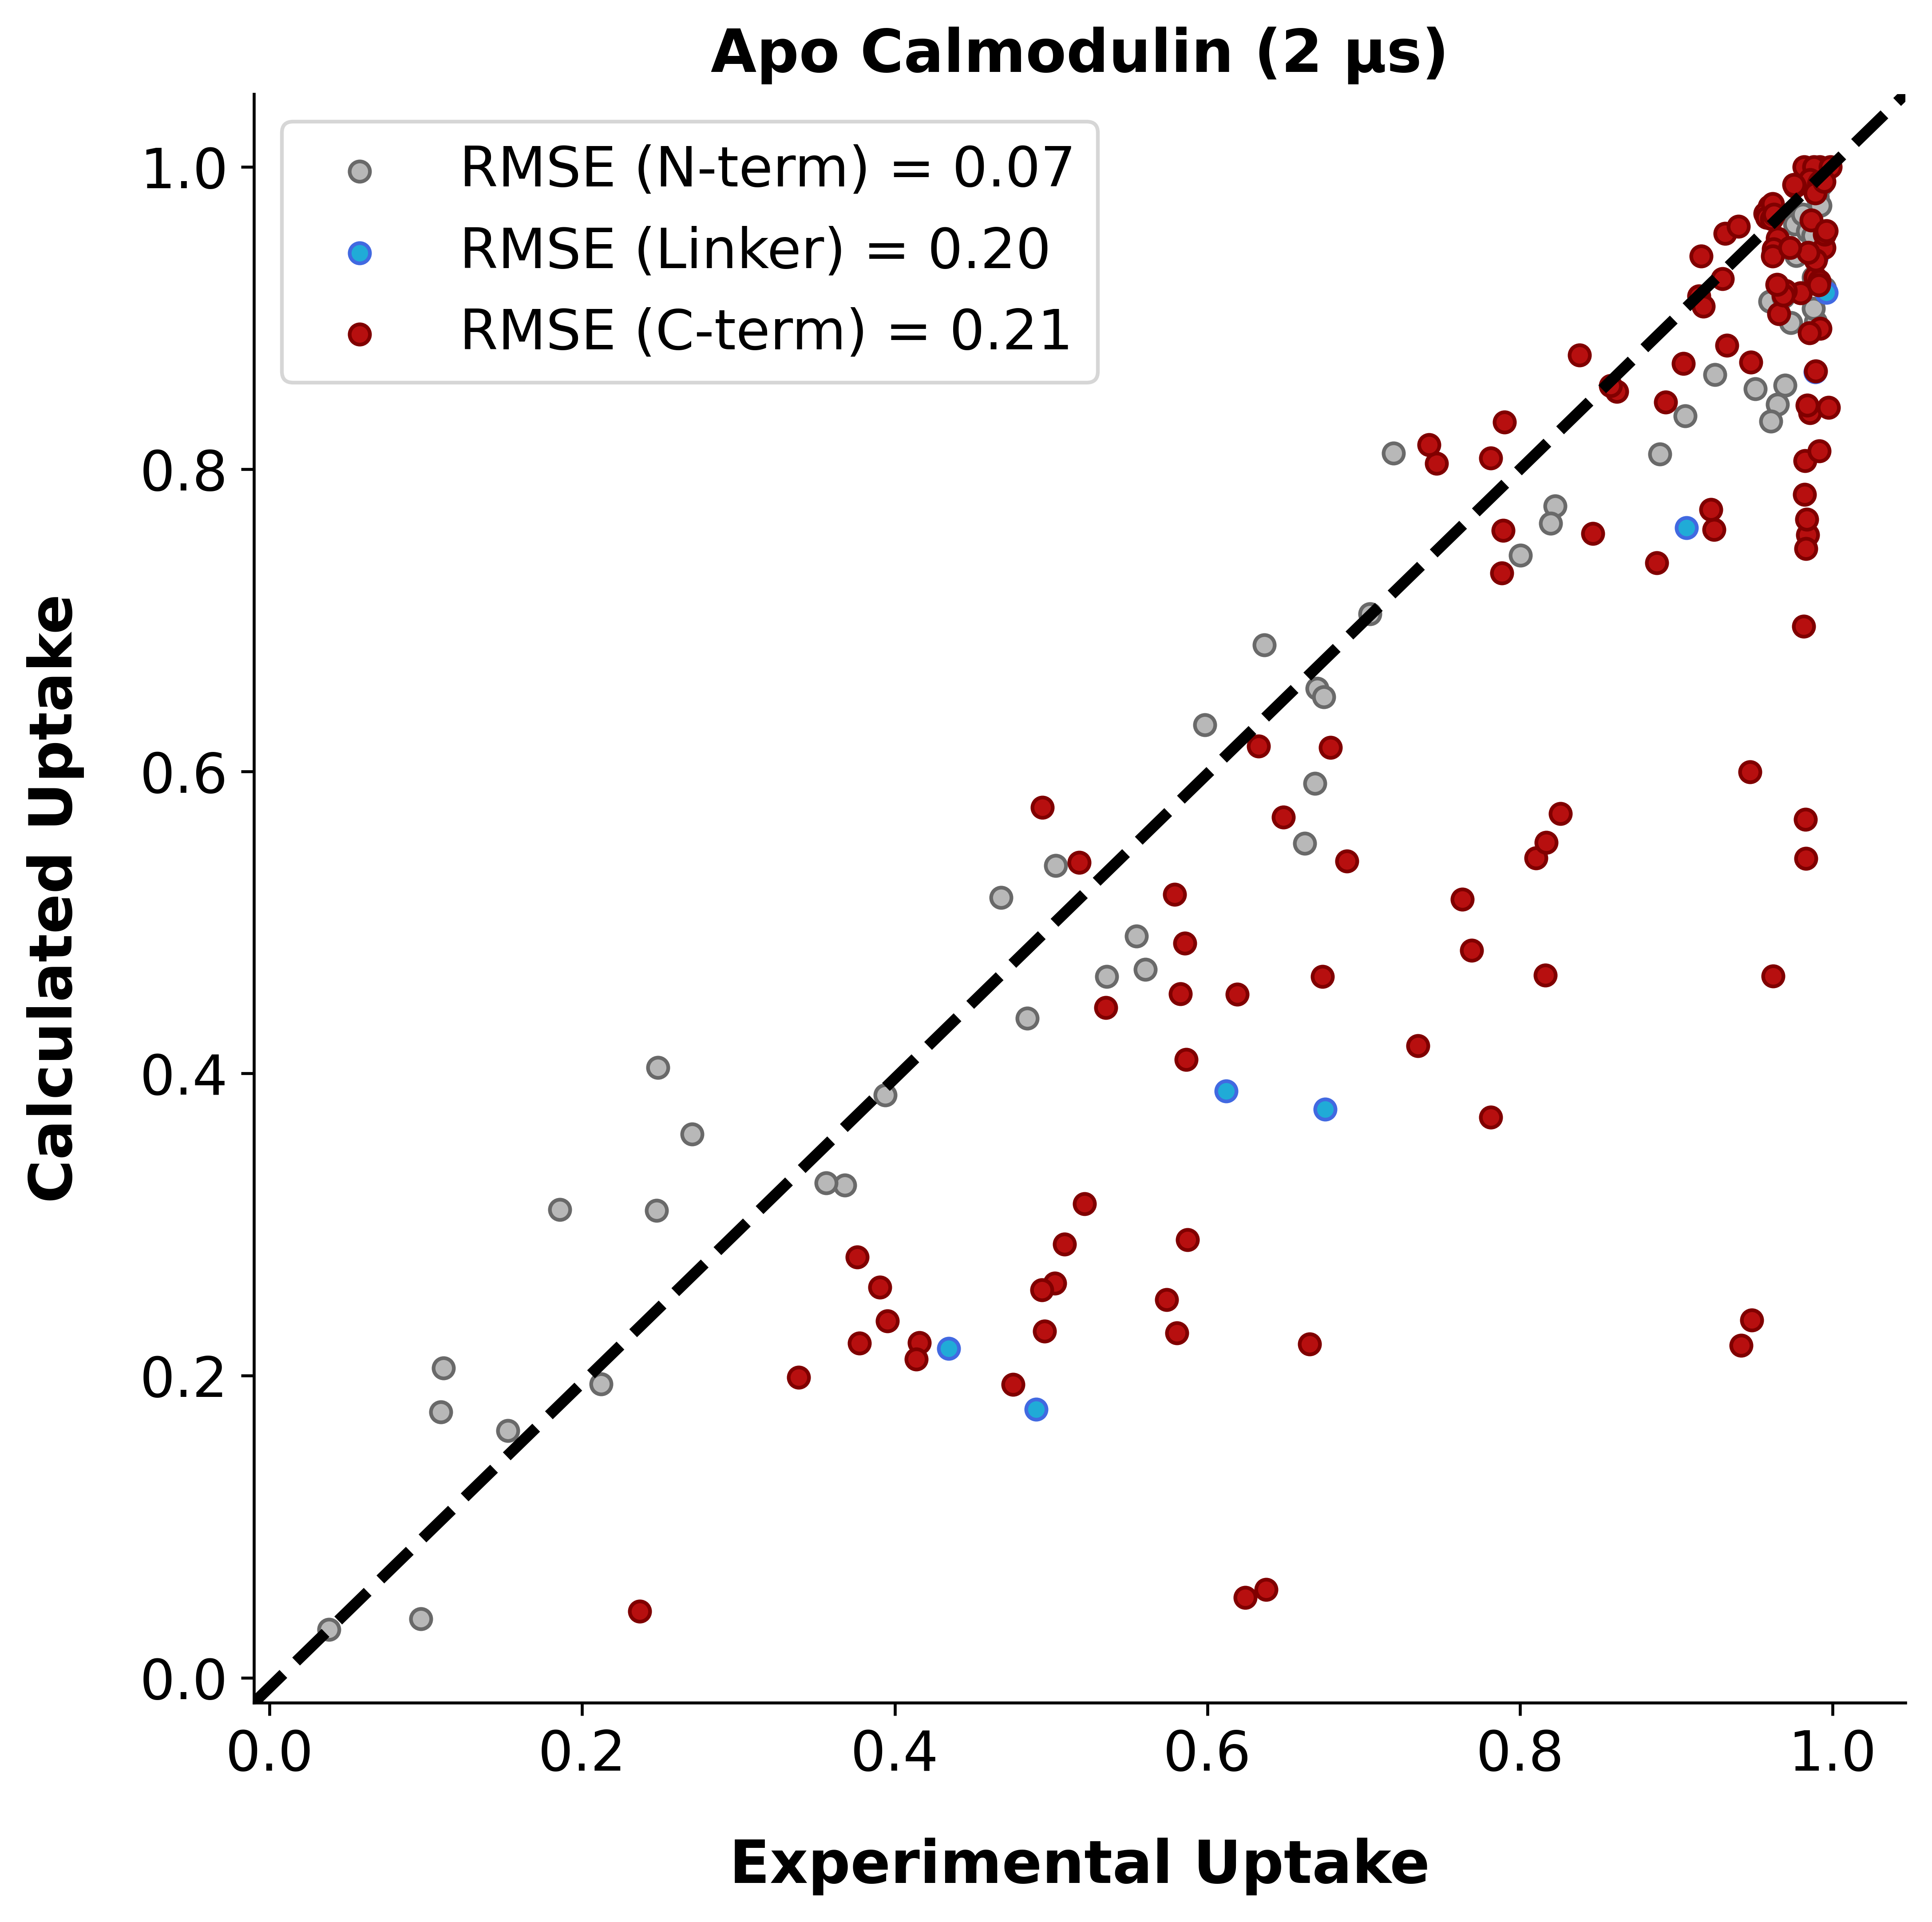

In [11]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(sel1_expt, sel1_pred, c='#b8b8b8', edgecolors='dimgray', s=30, label="RMSE (Sel 1) = " + str(rmse_sel1_float))
ax.scatter(sel2_expt, sel2_pred, c='#20abd7', edgecolors='royalblue', s=30, label="RMSE (Sel 2) = " + str(rmse_sel2_float))
ax.scatter(sel3_expt, sel3_pred, c='#b70f0f', edgecolors='maroon', s=30, label="RMSE (Sel 3) = " + str(rmse_sel3_float))
ax.plot((0, 1), (0, 1), transform=ax.transAxes,
        ls='--', c='k')
ax.set(xlabel="Experimental Uptake",
       ylabel="Calculated Uptake",
       title="System Name Identity Plot")
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
plt.legend(loc='upper left', fontsize=15)
fig.savefig('system-name_segs_identity.pdf', bbox_inches='tight')